<a href="https://colab.research.google.com/github/Raneevk/Book-Recommendation-System-Capstone-Project/blob/main/Book_Recommendation_System_Capstone_Project_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Book Recommendation System**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.
In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).
Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

## **Content**
The Book-Crossing dataset comprises 3 files.

### **● Users**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these
fields contain NULL values.
### **● Books**
Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.

### **● Ratings**

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

### **Importing Libraries**

In [ ]:
#Importing modules
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

### **Importing Dataset**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Loading data
path='/content/drive/MyDrive/Colab Notebooks/CSV DATA/data_book_recommendation/'
books=pd.read_csv(path+'Books.csv')
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


### There are total 8 columns and 271360 observations

In [ ]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

The dataset contains very few null values only

### Now lets convert column names into lower case and we can also replace "-" by "_".

In [ ]:
books.columns= books.columns.str.strip().str.lower().str.replace('-', '_')


In [ ]:
books.columns

Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'image_url_s', 'image_url_m', 'image_url_l'],
      dtype='object')

### Finding top 10 authors who wrote most number of books

Text(0.5, 1.0, 'Top 10 Authors')

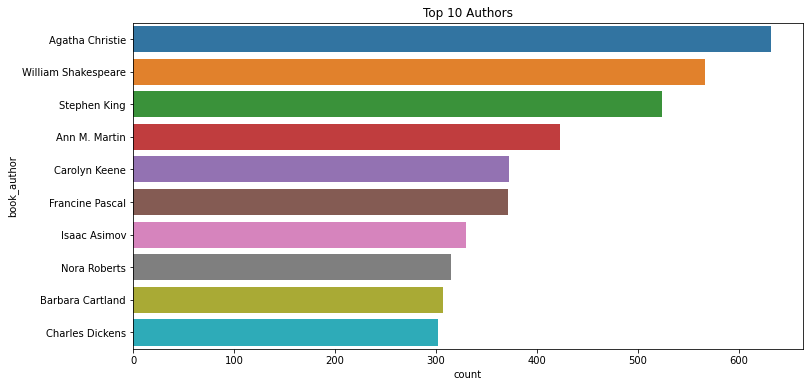

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y='book_author',data=books,order=pd.value_counts(books['book_author']).iloc[:10].index)
plt.title('Top 10 Authors')

In [ ]:
pd.value_counts(books['book_author']).iloc[:10]

Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Francine Pascal        372
Isaac Asimov           330
Nora Roberts           315
Barbara Cartland       307
Charles Dickens        302
Name: book_author, dtype: int64

### Most number of books are written by "Agatha Christie".

### **Which year has most number of books published? lets findout**

Text(0.5, 1.0, 'year vs published books')

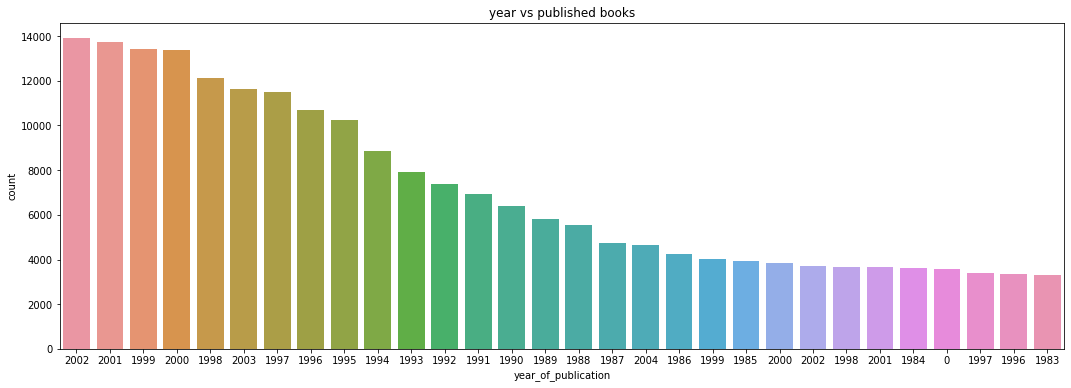

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='year_of_publication',data=books,order=pd.value_counts(books['year_of_publication']).iloc[:30].index)
plt.title('year vs published books')

### From the graph it is very clear that for last 30 years number of published books increasing in each year.

### **Who are the top 10 publishers ?**

Text(0.5, 1.0, 'Top 10 Publishers')

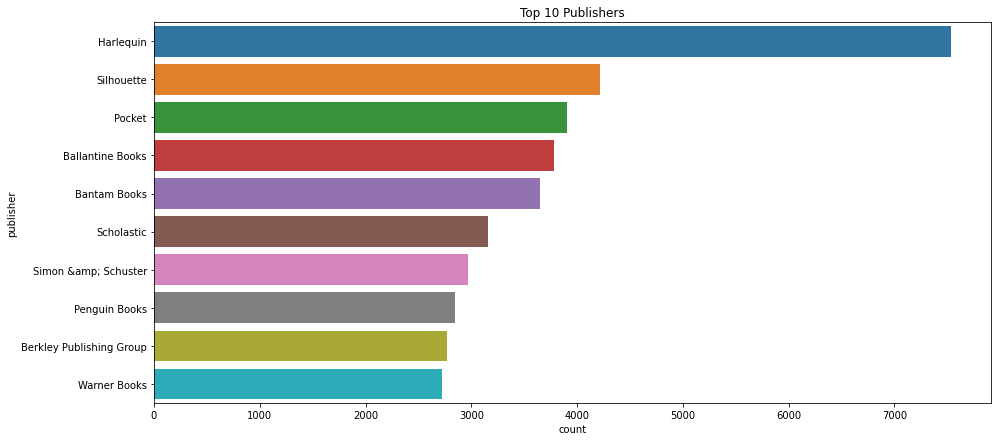

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(y='publisher',data=books,order=pd.value_counts(books['publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

In [ ]:
pd.value_counts(books['publisher']).iloc[:10]

Harlequin                   7535
Silhouette                  4220
Pocket                      3905
Ballantine Books            3783
Bantam Books                3646
Scholastic                  3160
Simon &amp; Schuster        2971
Penguin Books               2844
Berkley Publishing Group    2771
Warner Books                2727
Name: publisher, dtype: int64

In [ ]:
books['year_of_publication']=books['year_of_publication'].astype('str')
a=list(books['year_of_publication'].unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)


['0', '1376', '1378', '1806', '1897', '1900', '1901', '1902', '1904', '1906', '1908', '1909', '1910', '1911', '1914', '1917', '1919', '1920', '1921', '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929', '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937', '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945', '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953', '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2008', '2010', '2011', '2012', '2020', '2021', '2024', '2026', '2030', '2037', '2038', '2050', 'DK Publishing Inc', 'Gallimard']


### Lets investige the rows having 'DK Publishing Inc' as year Of Publication

In [ ]:
#investigating the rows having 'DK Publishing Inc' as year Of Publication
books.loc[books['year_of_publication'] == 'DK Publishing Inc',:]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
#investigating the rows having 'Gallimard' as year Of Publication
books.loc[books['year_of_publication'] == 'Gallimard',:]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


### There are two observations having 'DK Publishing Inc' in year of publication

From above, it is seen that bookAuthor is incorrectly loaded with bookTitle, hence making required correction

In [ ]:
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [ ]:
replace_df_value(books, 209538, 'book_title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(books, 209538, 'book_author', 'Michael Teitelbaum')
replace_df_value(books, 209538, 'year_of_publication', 2000)
replace_df_value(books, 209538, 'publisher', 'DK Publishing Inc')

replace_df_value(books, 221678, 'book_title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(books, 221678, 'book_author', 'James Buckley')
replace_df_value(books, 221678, 'year_of_publication', 2000)
replace_df_value(books, 221678, 'publisher', 'DK Publishing Inc')

replace_df_value(books, 220731,'book_title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(books, 220731, 'book_author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(books, 220731, 'year_of_publication', 2003)
replace_df_value(books, 220731, 'publisher', 'Gallimard')

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


### Let's check if the corrections are made properly.

In [ ]:
books.loc[209538]

isbn                                                          078946697X
book_title             DK Readers: Creating the X-Men, How It All Beg...
book_author                                           Michael Teitelbaum
year_of_publication                                                 2000
publisher                                              DK Publishing Inc
image_url_s            http://images.amazon.com/images/P/078946697X.0...
image_url_m            http://images.amazon.com/images/P/078946697X.0...
image_url_l                                                          NaN
Name: 209538, dtype: object

### The corrections are made successfully.Now Let's take care of the missing value in 'book_author' column.

In [ ]:
books.loc[(books['book_author'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [ ]:
books.loc[(books['isbn'] == '9627982032'),'book_author'] = 'Other'

### We've seen there are two missing values in the 'publisher' column. Let's take care of that.

In [ ]:
books.loc[(books['publisher'].isnull()),: ]

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [ ]:
books.loc[(books['isbn'] == '193169656X'),'publisher'] = 'unknown'
books.loc[(books['isbn'] == '1931696993'),'publisher'] = 'unknown'

## **Now Let's investigate the user dataset**

In [ ]:
#Loading data
path='/content/drive/MyDrive/Colab Notebooks/CSV DATA/data_book_recommendation/'
users=pd.read_csv(path+'Users.csv')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
print(users.shape)

(278858, 3)


There are 3 columns and 278858 observations

### Now lets convert column names into lower case and we can also replace "-" by "_".

In [ ]:
users.columns= users.columns.str.strip().str.lower().str.replace('-', '_')

In [ ]:
users.describe()

,user_id,age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


### There should be some outliers present in "Age" column because max value of given age is 244. Lets check

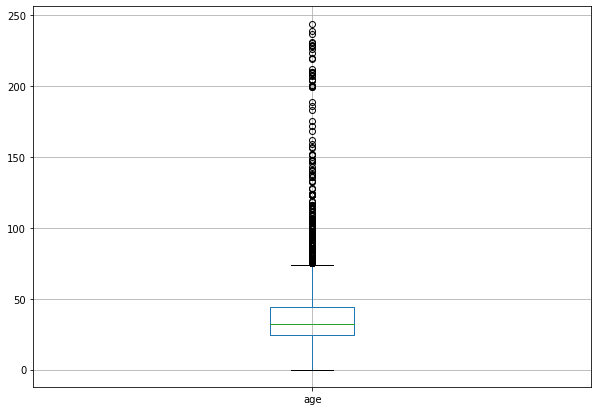

In [ ]:
df = pd.DataFrame(users, columns = ['age'])
plt.figure(figsize = (10, 7)) 
  
df.boxplot() 

### Lets fix this issue by using mean value of age

In [ ]:
users.loc[(users['age'] > 90) | (users['age'] < 5)] = np.nan
users['age'].fillna((users['age'].mean()), inplace=True)
users['age']= users['age'].astype('int64')
users['age'].unique()

array([34, 18, 17, 61, 26, 14, 25, 19, 46, 55, 32, 24, 20, 23, 51, 31, 21,
       44, 30, 57, 43, 37, 41, 54, 42, 50, 39, 53, 47, 36, 28, 35, 13, 58,
       49, 38, 45, 62, 63, 27, 33, 29, 66, 40, 15, 60, 79, 22, 16, 65, 59,
       48, 72, 56, 67, 80, 52, 69, 71, 73, 78,  9, 64, 12, 74, 75, 76, 83,
       68, 11, 77, 70,  8,  7, 81, 10,  5,  6, 84, 82, 90, 85, 86, 87, 89,
       88])

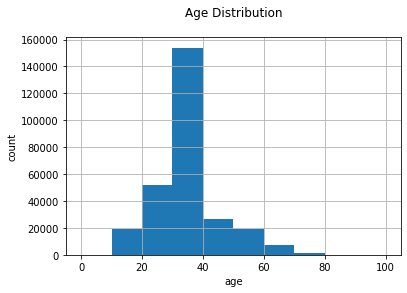

In [ ]:
users.age.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Age Distribution\n')
plt.xlabel('age')
plt.ylabel('count')
plt.savefig('age_dist.png', bbox_inches='tight')
plt.show()

### **Lets investigate rating dataset.**

In [ ]:
#Loading data
path='/content/drive/MyDrive/Colab Notebooks/CSV DATA/data_book_recommendation/'
Ratings=pd.read_csv(path+'Ratings.csv')
Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### **Now lets convert column names into lower case and we can also replace "-" by "_".**

In [ ]:
Ratings.columns= Ratings.columns.str.strip().str.lower().str.replace('-', '_')

We have to consider ISBNs that belongs to the main book_data set only.

In [ ]:
unique_ratings = Ratings[Ratings.isbn.isin(books.isbn)]

In [ ]:
print(unique_ratings.shape)

(1031136, 3)


In [ ]:
unique_ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2])

Text(0.5, 1.0, 'Top 10 Authors')

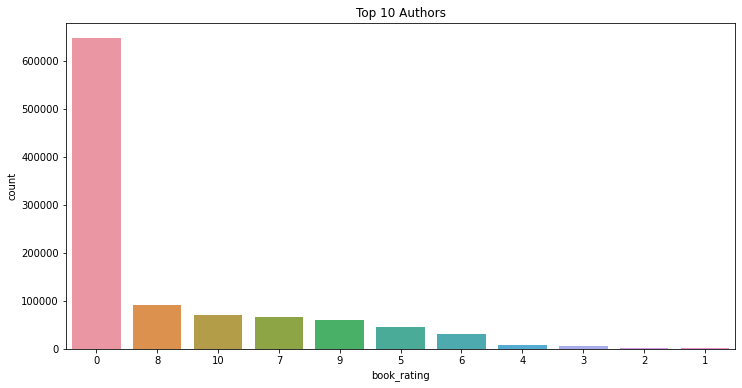

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='book_rating',data=unique_ratings,order=pd.value_counts(unique_ratings['book_rating']).index)
plt.title('Top 10 Authors')

From the graph it is very clear that zero is rated most. Which indirectly means that most of the users even didn't rated at all. Lets sortout zero ratings since we don't need those observations.

In [ ]:
ratings_explicit= unique_ratings[unique_ratings['book_rating'] != 0]

Lets Plot

Text(0.5, 1.0, 'Top 10 Authors')

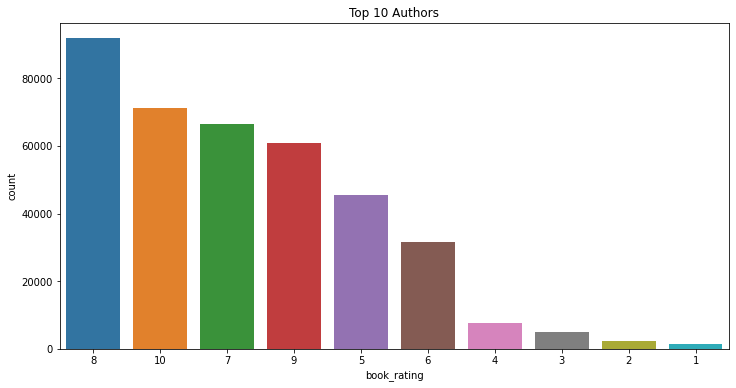

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='book_rating',data=ratings_explicit,order=pd.value_counts(ratings_explicit['book_rating']).index)
plt.title('Top 10 Authors')

### 8 has been rated highest number of times.

### We have seen that some of the year_of_publication inputs are in string format and some are in integer. So Lets convert all of them to float.

In [ ]:
books.year_of_publication = pd.to_numeric(books.year_of_publication, errors='coerce')

# Check for 0's or NaNs in Year of Publication
zero_year = books[books.year_of_publication == 0].year_of_publication.count()
nan_year = books.year_of_publication.isnull().sum()

print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')

# Replace all years of zero with NaN
books.year_of_publication.replace(0, np.nan, inplace=True)

There are 4618 entries as '0', and 0 NaN entries in the Year of Publication field


## **Memory-Based Collaborative Filtering**

Memory-Based Collaborative Filtering are of two kinds:


*   user-item filtering
*   item-item filtering

A user-item filtering will take a particular user and find users that are similar to that user based on similarity of ratings. Then it will recommend items that are similar to the ones the users liked.

Unlike user-item filtering, item-item filtering will take an item, find users who liked that item, and find other items that those users or similar users also liked. It takes items and recommends other items.


*   Item-Item Collaborative Filtering: “Users who liked this item also liked …”
*   User-Item Collaborative Filtering: “Users who are similar to you also liked …”





### **Train - Test Split**

In [ ]:
ratings_explicit.head()

,user_id,isbn,book_rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [ ]:
print(ratings_explicit.shape)

(383842, 3)


since our dataset is huge we will consider those users who did more than 100 ratings and only those books which has got more than 100 reviews.

In [ ]:
counts1 = ratings_explicit['user_id'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['user_id'].isin(counts1[counts1 >= 100].index)]
counts = ratings_explicit['book_rating'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['book_rating'].isin(counts[counts >= 100].index)]

In [ ]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(books, test_size=0.20)

Now Lets create a new dataframe by merging "books" dataset and "ratings_explicit" dataset



In [ ]:
new_book_df= pd.merge(books, ratings_explicit, on='isbn')
new_book_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l,user_id,book_rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,8
1,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,110912,10
2,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,197659,9
3,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,11676,9
4,0399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,46398,9


In [ ]:
from sklearn import model_selection
train_data, test_data = model_selection.train_test_split(new_book_df, test_size=0.20)

In [ ]:
print(f'Training set lengths: {len(train_data)}')
print(f'Testing set lengths: {len(test_data)}')
print(f'Test set is {(len(test_data)/(len(train_data)+len(test_data))*100):.0f}% of the full dataset.')

Training set lengths: 82616
Testing set lengths: 20655
Test set is 20% of the full dataset.


In [ ]:
# Get int mapping for user_id in train dataset

u_unique_train = train_data.user_id.unique()  
train_data_user2idx = {o:i for i, o in enumerate(u_unique_train)}

# Get int mapping for isbn in train dataset

i_unique_train = train_data.isbn.unique()  
train_data_book2idx = {o:i for i, o in enumerate(i_unique_train)}

# Get int mapping for user_id in test dataset

u_unique_test = test_data.user_id.unique()  
test_data_user2idx = {o:i for i, o in enumerate(u_unique_test)}

# Get int mapping for isbn in train dataset

i_unique_test = test_data.isbn.unique() 
test_data_book2idx = {o:i for i, o in enumerate(i_unique_test)}

In [ ]:

# TRAINING SET
train_data['u_unique'] = train_data['user_id'].map(train_data_user2idx)
train_data['i_unique'] = train_data['isbn'].map(train_data_book2idx)

# TESTING SET
test_data['u_unique'] = test_data['user_id'].map(test_data_user2idx)
test_data['i_unique'] = test_data['isbn'].map(test_data_book2idx)

# Convert back to 3-column df
train_data = train_data[['u_unique', 'i_unique', 'book_rating']]
test_data = test_data[['u_unique', 'i_unique', 'book_rating']]

In [ ]:
train_data.sample(10)

,u_unique,i_unique,book_rating
17022,18,15993,7
55472,93,30943,8
95390,169,16022,5
46843,172,4674,8
12719,307,13003,9
10337,230,41698,9
94175,32,36077,10
73482,58,40378,4
100941,301,34943,6
45397,5,21098,8


### **User-Item Matrix for Train Data**

In [ ]:
n_users = train_data['u_unique'].nunique()
n_books = train_data['i_unique'].nunique()

train_matrix = np.zeros((n_users, n_books))

for entry in train_data.itertuples():                  # entry[1] is the user-id, entry[2] is the book-isbn
    train_matrix[entry[1]-1, entry[2]-1] = entry[3]    # -1 is to counter 0-based indexing

In [ ]:
train_matrix.shape

(449, 55907)

### **User-Item Matrix for Test Data**

In [ ]:
n_users = test_data['u_unique'].nunique()
n_books = test_data['i_unique'].nunique()

test_matrix = np.zeros((n_users, n_books))

for entry in test_data.itertuples():
    test_matrix[entry[1]-1, entry[2]-1] = entry[3] 

In [ ]:
test_matrix.shape

(449, 17475)

## **Cosine Similarity Based Recommendation System**

As I am doing this calculations on my PC, so it is not a good idea to perform this huge calculation. So I'll perform on a subset initially. It will take a bit of time to calculate.

A distance metric commonly used in recommender systems is cosine similarity, where the ratings are seen as vectors in n-dimensional space and the similarity is calculated based on the angle between these vectors.

To make item-item similarity we need to take the transpose of the matrix.

In [ ]:
train_matrix_small = train_matrix[:5000, :5000]
test_matrix_small = test_matrix[:5000, :5000]

from sklearn.metrics.pairwise import pairwise_distances
user_similarity = pairwise_distances(train_matrix_small, metric='cosine')
item_similarity = pairwise_distances(train_matrix_small.T, metric='cosine') 

In [ ]:
# Now we'll define a function to predict the similarity 

In [ ]:
def predict_books(ratings, similarity, type='user'): # default type is 'user'
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        
        # Use np.newaxis so that mean_user_rating has the same format as ratings
        
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [ ]:
item_prediction = predict_books(train_matrix_small, item_similarity, type='item')
user_prediction = predict_books(train_matrix_small, user_similarity, type='user')

### **Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, test_matrix):
    prediction = prediction[test_matrix.nonzero()].flatten()
    test_matrix = test_matrix[test_matrix.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, test_matrix))

print(f'Item-based CF RMSE: {rmse(item_prediction, test_matrix_small)}')
print(f'User-based CF RMSE: {rmse(user_prediction, test_matrix_small)}')

Item-based CF RMSE: 7.999576007715759
User-based CF RMSE: 7.9998540029641445


 Our recommendation system gives 7.93 RMSE score,which is good